Recurrent Neral Networks

In [115]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from scipy.sparse.construct import random
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [116]:
train = pd.read_csv("KDDTrain5.csv", header = 0)
test = pd.read_csv("KDDTest5.csv", header = 0)

trainlen = len(train)
testlen = len(test)

trainx = train.drop(['malicious'], axis=1)
trainx = np.asarray(trainx)

trainy = train['malicious']
trainy = np.asarray(trainy)

#print(trainx)
#print(trainy)

data = np.array(trainx, dtype=float)
data = np.reshape(data, (125973, 5, 1))
target = np.array(trainy, dtype=float)

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)

Train model 

In [117]:
print(data.shape)
print(target.shape)

(125973, 5, 1)
(125973,)


In [118]:
model = Sequential()
model.add(LSTM((1), batch_input_shape=(None,5,1), return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 5, 1)              12        
_________________________________________________________________
lstm_20 (LSTM)               (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [119]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
3150/3150 [==============================] - 22s 5ms/step - loss: 0.2905 - accuracy: 0.7259 - val_loss: 0.1565 - val_accuracy: 0.8879
Epoch 2/10
3150/3150 [==============================] - 15s 5ms/step - loss: 0.1396 - accuracy: 0.8869 - val_loss: 0.1078 - val_accuracy: 0.8957
Epoch 3/10
3150/3150 [==============================] - 15s 5ms/step - loss: 0.1075 - accuracy: 0.8947 - val_loss: 0.1068 - val_accuracy: 0.8942
Epoch 4/10
3150/3150 [==============================] - 15s 5ms/step - loss: 0.1036 - accuracy: 0.8974 - val_loss: 0.1037 - val_accuracy: 0.8968
Epoch 5/10
3150/3150 [==============================] - 15s 5ms/step - loss: 0.1020 - accuracy: 0.8983 - val_loss: 0.1038 - val_accuracy: 0.8966
Epoch 6/10
3150/3150 [==============================] - 15s 5ms/step - loss: 0.1007 - accuracy: 0.8995 - val_loss: 0.1027 - val_accuracy: 0.8974
Epoch 7/10
3150/3150 [==============================] - 15s 5ms/step - loss: 0.0996 - accuracy: 0.9005 - val_loss: 0.1015 - val_ac

Predict on test set

In [ ]:
results = model.predict(x_test)

Plot results of first 50 points

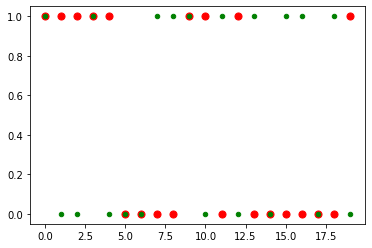

In [132]:
plt.scatter(range(20),results[:20],c='red', s=50)
plt.scatter(range(20),y_test[:20],c='green', s=20)
plt.show()

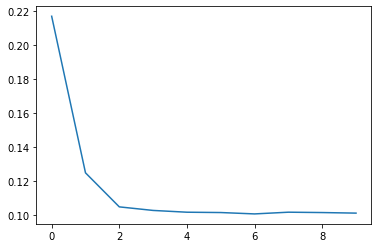

In [122]:
plt.plot(history.history['loss'])
plt.show()

Running on Validation set, KDDTrain5.csv

In [137]:
testx = test.drop(['malicious'], axis=1)
testx = np.asarray(testx)
testx = np.array(testx, dtype=float)
testx = np.reshape(testx, (22543, 5, 1))

testy = test['malicious']
testy = np.asarray(testy)
testy = np.array(testy, dtype=float)

results = model.predict(testx)

Plot results of first 20 points

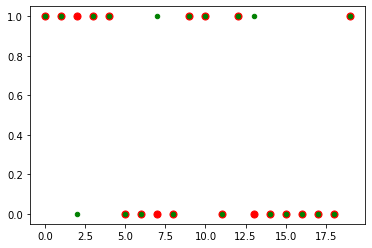

In [136]:
plt.scatter(range(20),results[:20],c='red',s=50)
plt.scatter(range(20),testy[:20],c='green',s=20)
plt.show()

Performance

In [142]:
tp = 0
fp = 0
tn = 0
fn = 0
pred = []
for i in results:
    for j in range(len(i)):
        if i[j] >= 0.5:
            output = 1
        else:
            output = 0
        pred.append(output)
            
        if output == testy[j]:
            if output == 1:
                tp += 1
            else:
                tn += 1
        else:
            if output == 1:
                fp += 1
            else:
                fn += 1

accuracy = (tp+tn) / len(test)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

#print(test)
print(accuracy, precision, recall)

            

0.3794526016945393 1.0 0.3794526016945393
